<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/Edulearn_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plataforma Edulearn

#Clustering

In [94]:
#Importando as bibliotecas
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [95]:
#Instalando a biblioteca biokit
#A versão atual do biokit (0.4.6) não é compatível com o Windows 10, é necessário instalar a versão 0.4.2, neste caso. 
!pip install biokit=="0.4.2"

In [96]:
#Importando os dados
df = pd.read_csv("dados_ies_sem_nan_sem_privadas_utf8.csv", sep=',', encoding='utf8', index_col=0)
df.head(4)

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,114,1,Pública Federal,Centro-Oeste,Mato Grosso,92.0,58.0,44.0,17.0,2.0,0.271930,0.429825,0.938596,0.201754,0.201754
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
2,116,3,Pública Federal,Nordeste,Sergipe,190.0,56.0,94.0,16.0,2.0,0.775862,1.215517,1.793103,0.534483,0.534483
3,107,4,Pública Federal,Norte,Amazonas,64.0,33.0,54.0,60.0,2.0,0.000000,0.000000,0.719626,0.000000,0.000000


In [97]:
df.describe()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,43.442149,6140.582645,24.285124,13.169421,24.834711,8.223140,1.466942,1.404203,1.725836,1.693946,0.905515,0.905515
std,49.916764,7492.824538,42.494682,29.540468,53.039224,16.515798,3.062445,1.567545,2.100311,1.800193,1.032678,1.032678
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,586.250000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.015341,0.318636,0.000000,0.000000
50%,28.000000,1816.500000,6.000000,3.000000,5.000000,2.000000,0.000000,0.759615,0.872222,1.000000,0.500000,0.500000
75%,59.750000,15403.000000,24.750000,14.750000,25.000000,8.000000,1.000000,2.263158,2.680952,2.552632,1.480490,1.480490
max,296.000000,24672.000000,284.000000,349.000000,351.000000,117.000000,17.000000,6.000000,9.000000,8.000000,4.000000,4.000000


In [98]:
#Selecionando apenas as IES que possuem recursos
df = df.loc[(df['RECURSOS_DEF_FISICA'] > 0.0) & (df['RECURSOS_DEF_VISUAL'] > 0.0) & (df['RECURSOS_DEF_AUDITIVA'] > 0.0) & (df['RECURSOS_DEF_COGNITIVA'] > 0.0)  & (df['RECURSOS_DEF_MULTIPLA'] > 0.0)]

In [99]:
df.describe()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,48.254335,5341.809249,28.005780,15.462428,26.838150,9.381503,1.774566,1.964261,2.393190,2.273966,1.266674,1.266674
std,50.290251,6804.025090,45.245904,33.526023,55.718221,17.361549,3.399904,1.528541,2.143841,1.817377,1.016909,1.016909
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030534,0.022901,0.127273,0.022901,0.022901
25%,6.000000,585.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.666667,0.666667,0.833333,0.428571,0.428571
50%,35.000000,1810.000000,11.000000,5.000000,9.000000,3.000000,0.000000,1.605634,1.718750,1.925926,1.000000,1.000000
75%,65.000000,5627.000000,34.000000,18.000000,30.000000,9.000000,2.000000,3.000000,3.750000,3.103448,1.987952,1.987952
max,296.000000,24672.000000,284.000000,349.000000,351.000000,117.000000,17.000000,6.000000,9.000000,8.000000,4.000000,4.000000


## Outliers

Número de cursos

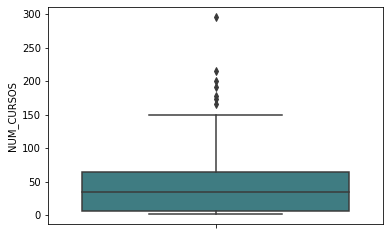

In [100]:
#Visualizando os outliers de número de cursos
sns.boxplot(y="NUM_CURSOS", palette="crest_r", data=df)

In [101]:
df.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,114,1,Pública Federal,Centro-Oeste,Mato Grosso,92.0,58.0,44.0,17.0,2.0,0.271930,0.429825,0.938596,0.201754,0.201754
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
2,116,3,Pública Federal,Nordeste,Sergipe,190.0,56.0,94.0,16.0,2.0,0.775862,1.215517,1.793103,0.534483,0.534483
4,100,5,Pública Federal,Nordeste,Piauí,137.0,50.0,73.0,36.0,3.0,4.200000,5.880000,5.880000,2.520000,2.520000
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636


Tratando Outliers

In [102]:
num_cursos_novo = df['NUM_CURSOS']
Q1 = num_cursos_novo.quantile(.25)
Q3 = num_cursos_novo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [103]:
selecao = (num_cursos_novo >= limite_inferior) & (num_cursos_novo <= limite_superior)
novo_df = df[selecao]
novo_df.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,114,1,Pública Federal,Centro-Oeste,Mato Grosso,92.0,58.0,44.0,17.0,2.0,0.271930,0.429825,0.938596,0.201754,0.201754
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
2,116,3,Pública Federal,Nordeste,Sergipe,190.0,56.0,94.0,16.0,2.0,0.775862,1.215517,1.793103,0.534483,0.534483
4,100,5,Pública Federal,Nordeste,Piauí,137.0,50.0,73.0,36.0,3.0,4.200000,5.880000,5.880000,2.520000,2.520000
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636


In [104]:
novo_df.describe()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,41.740964,5552.204819,27.325301,15.204819,26.771084,8.765060,1.572289,1.995660,2.425224,2.309753,1.285152,1.285152
std,38.856368,6866.969950,45.291275,34.087146,56.696497,17.036474,3.069530,1.535811,2.156258,1.826822,1.021763,1.021763
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030534,0.022901,0.127273,0.022901,0.022901
25%,6.000000,591.250000,1.000000,1.000000,2.000000,0.000000,0.000000,0.708333,0.750000,0.894649,0.452885,0.452885
50%,33.000000,1816.500000,9.500000,4.000000,8.000000,2.500000,0.000000,1.689498,1.744510,1.945673,1.000000,1.000000
75%,58.000000,5684.000000,33.500000,15.750000,29.750000,8.750000,1.750000,3.000000,3.750000,3.223230,2.000000,2.000000
max,150.000000,24672.000000,284.000000,349.000000,351.000000,117.000000,16.000000,6.000000,9.000000,8.000000,4.000000,4.000000


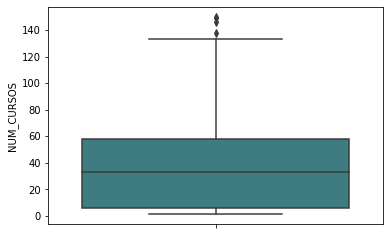

In [105]:
sns.boxplot(y='NUM_CURSOS', palette="crest_r", data=novo_df)

Alunos com deficiência

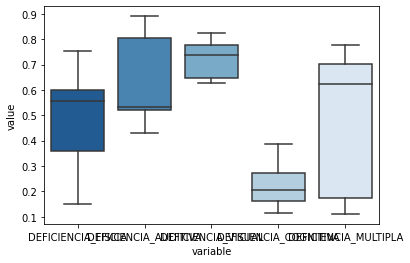

In [106]:
#Visualizando os outliers de alunos por deficiência
deficiencia = pd.DataFrame(data = np.random.random(size=(5,5)), columns = ['DEFICIENCIA_FISICA','DEFICIENCIA_AUDITIVA','DEFICIENCIA_VISUAL','DEFICIENCIA_COGNITIVA','DEFICIENCIA_MULTIPLA'])
sns.boxplot(x="variable", y="value", data=pd.melt(deficiencia), palette="Blues_r")
plt.show()

In [107]:
df.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,114,1,Pública Federal,Centro-Oeste,Mato Grosso,92.0,58.0,44.0,17.0,2.0,0.271930,0.429825,0.938596,0.201754,0.201754
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
2,116,3,Pública Federal,Nordeste,Sergipe,190.0,56.0,94.0,16.0,2.0,0.775862,1.215517,1.793103,0.534483,0.534483
4,100,5,Pública Federal,Nordeste,Piauí,137.0,50.0,73.0,36.0,3.0,4.200000,5.880000,5.880000,2.520000,2.520000
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636


In [108]:
#Tratando outliers no campo de recursos para deficiência física
deficiencia_fisica = df['DEFICIENCIA_FISICA']
Q1 = deficiencia_fisica.quantile(.25)
Q3 = deficiencia_fisica.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [109]:
selecao = (deficiencia_fisica >= limite_inferior) & (deficiencia_fisica <= limite_superior)
novo_df = novo_df[selecao]
novo_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636
6,76,7,Pública Federal,Sudeste,São Paulo,0.0,19.0,5.0,0.0,0.0,1.578947,2.105263,1.842105,1.052632,1.052632
7,84,8,Pública Federal,Sudeste,Minas Gerais,18.0,6.0,15.0,4.0,1.0,2.071429,3.107143,2.761905,1.380952,1.380952
8,58,9,Pública Estadual,Sul,Paraná,18.0,6.0,15.0,13.0,0.0,2.741379,3.672414,2.293103,1.810345,1.810345


In [110]:
novo_df.describe()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,36.066225,5999.158940,16.026490,12.059603,19.973510,5.973510,1.165563,1.910866,2.281926,2.170179,1.230983,1.230983
std,34.165220,7032.053383,20.423172,33.503081,49.840271,11.726862,2.629146,1.499766,2.076478,1.752102,0.998557,0.998557
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030534,0.022901,0.127273,0.022901,0.022901
25%,5.000000,599.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.669872,0.666667,0.825758,0.433036,0.433036
50%,29.000000,3163.000000,8.000000,3.000000,5.000000,2.000000,0.000000,1.505051,1.666667,1.761194,1.000000,1.000000
75%,55.000000,14862.500000,21.500000,11.000000,19.000000,6.500000,1.000000,2.817100,3.318841,3.000000,1.897701,1.897701
max,149.000000,24672.000000,81.000000,349.000000,351.000000,87.000000,16.000000,6.000000,9.000000,8.000000,4.000000,4.000000


In [111]:
#Tratando outliers no campo de recursos para deficiência auditiva
deficiencia_auditiva = df['DEFICIENCIA_AUDITIVA']
Q1 = deficiencia_auditiva.quantile(.25)
Q3 = deficiencia_auditiva.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [112]:
selecao = (deficiencia_auditiva >= limite_inferior) & (deficiencia_auditiva <= limite_superior)
novo_df = novo_df[selecao]
novo_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636
6,76,7,Pública Federal,Sudeste,São Paulo,0.0,19.0,5.0,0.0,0.0,1.578947,2.105263,1.842105,1.052632,1.052632
7,84,8,Pública Federal,Sudeste,Minas Gerais,18.0,6.0,15.0,4.0,1.0,2.071429,3.107143,2.761905,1.380952,1.380952
8,58,9,Pública Estadual,Sul,Paraná,18.0,6.0,15.0,13.0,0.0,2.741379,3.672414,2.293103,1.810345,1.810345


In [113]:
#Tratando outliers no campo de recursos para deficiência visual
deficiencia_visual = df['DEFICIENCIA_VISUAL']
Q1 = deficiencia_visual.quantile(.25)
Q3 = deficiencia_visual.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [114]:
selecao = (deficiencia_auditiva >= limite_inferior) & (deficiencia_auditiva <= limite_superior)
novo_df = novo_df[selecao]
novo_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636
6,76,7,Pública Federal,Sudeste,São Paulo,0.0,19.0,5.0,0.0,0.0,1.578947,2.105263,1.842105,1.052632,1.052632
7,84,8,Pública Federal,Sudeste,Minas Gerais,18.0,6.0,15.0,4.0,1.0,2.071429,3.107143,2.761905,1.380952,1.380952
8,58,9,Pública Estadual,Sul,Paraná,18.0,6.0,15.0,13.0,0.0,2.741379,3.672414,2.293103,1.810345,1.810345


In [115]:
#Tratando outliers no campo de recursos para deficiência cognitiva
deficiencia_cognitiva = df['DEFICIENCIA_COGNITIVA']
Q1 = deficiencia_cognitiva.quantile(.25)
Q3 = deficiencia_cognitiva.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [116]:
selecao = (deficiencia_cognitiva >= limite_inferior) & (deficiencia_cognitiva <= limite_superior)
novo_df = novo_df[selecao]
novo_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
6,76,7,Pública Federal,Sudeste,São Paulo,0.0,19.0,5.0,0.0,0.0,1.578947,2.105263,1.842105,1.052632,1.052632
7,84,8,Pública Federal,Sudeste,Minas Gerais,18.0,6.0,15.0,4.0,1.0,2.071429,3.107143,2.761905,1.380952,1.380952
8,58,9,Pública Estadual,Sul,Paraná,18.0,6.0,15.0,13.0,0.0,2.741379,3.672414,2.293103,1.810345,1.810345
11,64,12,Pública Federal,Sul,Rio Grande do Sul,46.0,21.0,37.0,17.0,0.0,3.937500,5.906250,5.218750,2.625000,2.625000
22,39,24,Pública Estadual,Nordeste,Bahia,3.0,0.0,3.0,2.0,0.0,0.769231,1.153846,1.025641,0.512821,0.512821


In [117]:
#Tratando outliers no campo de recursos para deficiência múltipla
deficiencia_multipla = df['DEFICIENCIA_MULTIPLA']
Q1 = deficiencia_multipla.quantile(.25)
Q3 = deficiencia_multipla.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [118]:
selecao = (deficiencia_multipla >= limite_inferior) & (deficiencia_multipla <= limite_superior)
novo_df = novo_df[selecao]
novo_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
6,76,7,Pública Federal,Sudeste,São Paulo,0.0,19.0,5.0,0.0,0.0,1.578947,2.105263,1.842105,1.052632,1.052632
7,84,8,Pública Federal,Sudeste,Minas Gerais,18.0,6.0,15.0,4.0,1.0,2.071429,3.107143,2.761905,1.380952,1.380952
8,58,9,Pública Estadual,Sul,Paraná,18.0,6.0,15.0,13.0,0.0,2.741379,3.672414,2.293103,1.810345,1.810345
11,64,12,Pública Federal,Sul,Rio Grande do Sul,46.0,21.0,37.0,17.0,0.0,3.937500,5.906250,5.218750,2.625000,2.625000
22,39,24,Pública Estadual,Nordeste,Bahia,3.0,0.0,3.0,2.0,0.0,0.769231,1.153846,1.025641,0.512821,0.512821


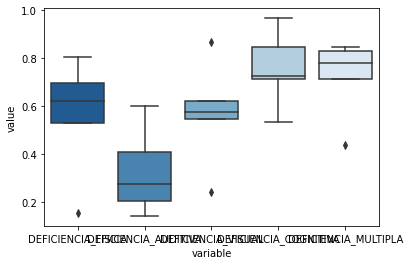

In [119]:
#Visualizando os outliers de alunos por deficiência
deficiencia = pd.DataFrame(data = np.random.random(size=(5,5)), columns = ['DEFICIENCIA_FISICA','DEFICIENCIA_AUDITIVA','DEFICIENCIA_VISUAL','DEFICIENCIA_COGNITIVA','DEFICIENCIA_MULTIPLA'])
sns.boxplot(x="variable", y="value", data=pd.melt(deficiencia), palette="Blues_r")
plt.show()

#Dados categóricos (tipo de categoria administrativa, regiao e uf)
Substituindo os dados do formato string

In [131]:
#Substituindo o tipo de categoria administrativa para um código
categoria_adm = {
  "Especial": 0,
  "Pública Estadual": 1,
  "Pública Federal": 2,
  "Pública Municipal": 3
}
novo_df.TIPO_CATEGORIA_ADM = novo_df.TIPO_CATEGORIA_ADM.map(categoria_adm)
novo_df.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
6,0.576923,7,2,Sudeste,São Paulo,0.000000,0.441860,0.015060,0.00,0.0,0.259389,0.231964,0.217819,0.258915,0.258915
7,0.638462,8,2,Sudeste,Minas Gerais,0.222222,0.139535,0.045181,0.20,0.2,0.341889,0.343568,0.334653,0.341468,0.341468
8,0.438462,9,1,Sul,Paraná,0.222222,0.139535,0.045181,0.65,0.0,0.454119,0.406536,0.275106,0.449434,0.449434
11,0.484615,12,2,Sul,Rio Grande do Sul,0.567901,0.488372,0.111446,0.85,0.0,0.654492,0.655373,0.646723,0.654271,0.654271
22,0.292308,24,1,Nordeste,Bahia,0.037037,0.000000,0.009036,0.10,0.0,0.123746,0.125981,0.114111,0.123185,0.123185


In [132]:
#Substituindo o nome das regiões por códigos
regiao = {
  "Centro-Oeste": 0,
  "Nordeste": 1,
  "Norte": 2,
  "Sudeste": 3,
  "Sul": 4
}
novo_df.REGIAO = novo_df.REGIAO.map(regiao)
novo_df.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
6,0.576923,7,2,3,São Paulo,0.000000,0.441860,0.015060,0.00,0.0,0.259389,0.231964,0.217819,0.258915,0.258915
7,0.638462,8,2,3,Minas Gerais,0.222222,0.139535,0.045181,0.20,0.2,0.341889,0.343568,0.334653,0.341468,0.341468
8,0.438462,9,1,4,Paraná,0.222222,0.139535,0.045181,0.65,0.0,0.454119,0.406536,0.275106,0.449434,0.449434
11,0.484615,12,2,4,Rio Grande do Sul,0.567901,0.488372,0.111446,0.85,0.0,0.654492,0.655373,0.646723,0.654271,0.654271
22,0.292308,24,1,1,Bahia,0.037037,0.000000,0.009036,0.10,0.0,0.123746,0.125981,0.114111,0.123185,0.123185


In [133]:
#Substituindo o nome das unidades federativas por códigos
uf = {
  "Acre": 0,
  "Alagoas": 1,
  "Amapá": 2,
  "Amazonas": 3,
  "Bahia": 4,
  "Ceará": 5,
  "Distrito Federal": 6,
  "Espírito Santo": 7,
  "Goiás": 8,
  "Maranhão": 9,
  "Mato Grosso": 10,
  "Mato Grosso do Sul": 11,
  "Minas Gerais": 12,
  "Paraná": 13,
  "Paraíba": 14,
  "Pará": 15,
  "Pernambuco": 16,
  "Piauí": 17,
  "Rio Grande do Norte": 18,
  "Rio Grande do Sul": 19,
  "Rio de Janeiro": 20,
  "Rondônia": 21,
  "Roraima": 22,
  "Santa Catarina": 23,
  "Sergipe": 24,
  "São Paulo": 25,
  "Tocantins": 26
  }
novo_df.UF = novo_df.UF.map(uf)
novo_df.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
6,0.576923,7,2,3,25,0.000000,0.441860,0.015060,0.00,0.0,0.259389,0.231964,0.217819,0.258915,0.258915
7,0.638462,8,2,3,12,0.222222,0.139535,0.045181,0.20,0.2,0.341889,0.343568,0.334653,0.341468,0.341468
8,0.438462,9,1,4,13,0.222222,0.139535,0.045181,0.65,0.0,0.454119,0.406536,0.275106,0.449434,0.449434
11,0.484615,12,2,4,19,0.567901,0.488372,0.111446,0.85,0.0,0.654492,0.655373,0.646723,0.654271,0.654271
22,0.292308,24,1,1,4,0.037037,0.000000,0.009036,0.10,0.0,0.123746,0.125981,0.114111,0.123185,0.123185


# Analisando os dados

In [134]:
novo_df.describe()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,48.254335,5341.809249,1.595376,2.421965,16.843931,28.005780,15.462428,26.838150,9.381503,1.774566,1.964261,2.393190,2.273966,1.266674,1.266674
std,50.290251,6804.025090,0.636471,1.166879,7.526228,45.245904,33.526023,55.718221,17.361549,3.399904,1.528541,2.143841,1.817377,1.016909,1.016909
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030534,0.022901,0.127273,0.022901,0.022901
25%,6.000000,585.000000,1.000000,1.000000,12.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.666667,0.666667,0.833333,0.428571,0.428571
50%,35.000000,1810.000000,2.000000,3.000000,19.000000,11.000000,5.000000,9.000000,3.000000,0.000000,1.605634,1.718750,1.925926,1.000000,1.000000
75%,65.000000,5627.000000,2.000000,3.000000,25.000000,34.000000,18.000000,30.000000,9.000000,2.000000,3.000000,3.750000,3.103448,1.987952,1.987952
max,296.000000,24672.000000,3.000000,4.000000,26.000000,284.000000,349.000000,351.000000,117.000000,17.000000,6.000000,9.000000,8.000000,4.000000,4.000000


#Matriz de Correlação

In [124]:
#Usando matriz de correlação
matriz_corr = df.corr()
matriz_corr

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
NUM_CURSOS,1.000000,-0.463520,0.162895,-0.153622,-0.241103,0.488308,0.276536,0.362861,0.507919,0.445746,-0.069632,0.023277,0.030848,-0.051294,-0.051294
CODIGO_IES,-0.463520,1.000000,-0.191165,0.138408,0.158293,-0.299854,-0.213603,-0.244148,-0.251050,-0.255289,0.004616,-0.084142,-0.099360,-0.011447,-0.011447
TIPO_CATEGORIA_ADM,0.162895,-0.191165,1.000000,-0.136701,-0.322756,0.236293,0.198183,0.120117,0.132959,0.210156,0.003983,0.065603,0.116173,0.001842,0.001842
REGIAO,-0.153622,0.138408,-0.136701,1.000000,0.506040,-0.244403,-0.100725,-0.155791,-0.126517,-0.154671,0.109086,0.056926,0.007163,0.099141,0.099141
UF,-0.241103,0.158293,-0.322756,0.506040,1.000000,-0.196885,-0.141118,-0.208538,-0.170801,-0.176562,0.074125,0.018922,-0.045946,0.060801,0.060801
DEFICIENCIA_FISICA,0.488308,-0.299854,0.236293,-0.244403,-0.196885,1.000000,0.377144,0.523579,0.619036,0.475120,0.203433,0.251763,0.296215,0.194073,0.194073
DEFICIENCIA_AUDITIVA,0.276536,-0.213603,0.198183,-0.100725,-0.141118,0.377144,1.000000,0.309965,0.304245,0.239119,0.281144,0.323271,0.363889,0.286140,0.286140
DEFICIENCIA_VISUAL,0.362861,-0.244148,0.120117,-0.155791,-0.208538,0.523579,0.309965,1.000000,0.592558,0.468423,0.293413,0.351062,0.383419,0.302654,0.302654
DEFICIENCIA_COGNITIVA,0.507919,-0.251050,0.132959,-0.126517,-0.170801,0.619036,0.304245,0.592558,1.000000,0.565746,0.215256,0.271683,0.288787,0.222751,0.222751
DEFICIENCIA_MULTIPLA,0.445746,-0.255289,0.210156,-0.154671,-0.176562,0.475120,0.239119,0.468423,0.565746,1.000000,0.073626,0.111916,0.151204,0.075996,0.075996


/usr/local/lib/python3.7/dist-packages/biokit/viz/linkage.py:41: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

/usr/local/lib/python3.7/dist-packages/biokit/viz/corrplot.py:335: MatplotlibDeprecationWarning:


The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.



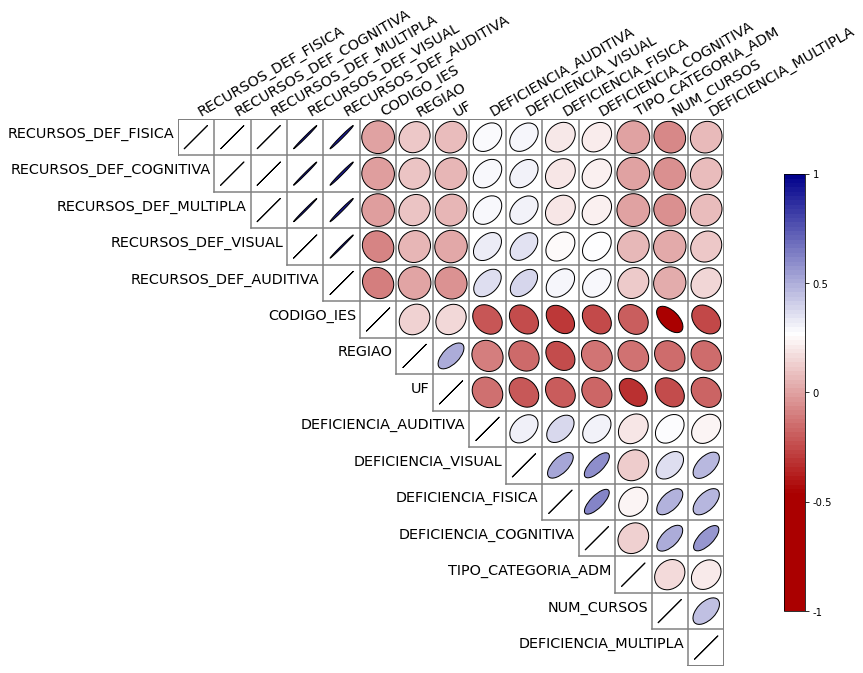

In [135]:
#Observando a correlação entre os dados
from biokit.viz import corrplot
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(40, 15)
fig.show()

#Normalização

In [126]:
novo_df.columns

Index(['NUM_CURSOS', 'CODIGO_IES', 'TIPO_CATEGORIA_ADM', 'REGIAO', 'UF',
       'DEFICIENCIA_FISICA', 'DEFICIENCIA_AUDITIVA', 'DEFICIENCIA_VISUAL',
       'DEFICIENCIA_COGNITIVA', 'DEFICIENCIA_MULTIPLA', 'RECURSOS_DEF_FISICA',
       'RECURSOS_DEF_VISUAL', 'RECURSOS_DEF_AUDITIVA',
       'RECURSOS_DEF_COGNITIVA', 'RECURSOS_DEF_MULTIPLA'],
      dtype='object')

In [127]:
#Colunas para normalizar
features_to_normalize = ['NUM_CURSOS','DEFICIENCIA_FISICA', 'DEFICIENCIA_AUDITIVA', 'DEFICIENCIA_VISUAL','DEFICIENCIA_COGNITIVA', 'DEFICIENCIA_MULTIPLA', 'RECURSOS_DEF_FISICA', 'RECURSOS_DEF_VISUAL', 'RECURSOS_DEF_AUDITIVA', 'RECURSOS_DEF_COGNITIVA', 'RECURSOS_DEF_MULTIPLA']

novo_df[features_to_normalize] = novo_df[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [128]:
#Dataframe normalizado
novo_df.describe()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.231538,6527.061538,0.146154,0.127549,0.043675,0.156538,0.103077,0.290440,0.224482,0.231310,0.278655,0.278655
std,0.234984,7256.009347,0.208579,0.187242,0.126718,0.212533,0.190038,0.245557,0.219897,0.212273,0.244282,0.244282
min,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.023077,672.500000,0.012346,0.000000,0.003012,0.000000,0.000000,0.083404,0.058210,0.079099,0.084531,0.084531
50%,0.176923,3234.000000,0.055556,0.046512,0.012048,0.050000,0.000000,0.238311,0.164541,0.190469,0.226516,0.226516
75%,0.380769,15516.750000,0.185185,0.156977,0.036145,0.200000,0.200000,0.422657,0.316780,0.308071,0.402831,0.402831
max,1.000000,24672.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Clusterização dos dados

##1- Usando o K-means

In [ ]:
from sklearn.cluster import KMeans

In [130]:
novo_df.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
6,0.576923,7,Pública Federal,Sudeste,São Paulo,0.000000,0.441860,0.015060,0.00,0.0,0.259389,0.231964,0.217819,0.258915,0.258915
7,0.638462,8,Pública Federal,Sudeste,Minas Gerais,0.222222,0.139535,0.045181,0.20,0.2,0.341889,0.343568,0.334653,0.341468,0.341468
8,0.438462,9,Pública Estadual,Sul,Paraná,0.222222,0.139535,0.045181,0.65,0.0,0.454119,0.406536,0.275106,0.449434,0.449434
11,0.484615,12,Pública Federal,Sul,Rio Grande do Sul,0.567901,0.488372,0.111446,0.85,0.0,0.654492,0.655373,0.646723,0.654271,0.654271
22,0.292308,24,Pública Estadual,Nordeste,Bahia,0.037037,0.000000,0.009036,0.10,0.0,0.123746,0.125981,0.114111,0.123185,0.123185


In [141]:
#Agrupando em 3 grupos
agrupador = KMeans(n_clusters = 3)
agrupador.fit(novo_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [143]:
labels = agrupador.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [147]:
#Visualizando os clusters
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['RECURSOS_DEF_FISICA'], y=df['DEFICIENCIA_FISICA'], 
                         mode = 'markers',
                         marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))
fig.show()

In [145]:
#Visualização em três dimensões
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['DEFICIENCIA_VISUAL'],
                          y=df['RECURSOS_DEF_VISUAL'],
                          z=df['TIPO_CATEGORIA_ADM'],
                          mode = 'markers',
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                          text = labels))
fig.show()

In [146]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['DEFICIENCIA_VISUAL'],
                          y=df['RECURSOS_DEF_VISUAL'],
                          z=df['NUM_CURSOS'],
                          mode = 'markers',
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                          text = labels))
fig.show()

In [148]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['DEFICIENCIA_VISUAL'],
                          y=df['RECURSOS_DEF_VISUAL'],
                          z=df['UF'],
                          mode = 'markers',
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                          text = labels))
fig.show()

In [149]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['DEFICIENCIA_VISUAL'],
                          y=df['RECURSOS_DEF_VISUAL'],
                          z=df['REGIAO'],
                          mode = 'markers',
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                          text = labels))
fig.show()

#2 - Usando o algoritmo DBSCAN

In [150]:
from sklearn.cluster import DBSCAN
agrupador = DBSCAN(eps = 1.31,
                   min_samples = 10,
                   metric = 'euclidean')
agrupador.fit(novo_df)

DBSCAN(algorithm='auto', eps=1.31, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [151]:
#Visualizando o número total de clusters
np.unique(agrupador.labels_)

array([-1])

In [155]:
#Quando reduzimos muito o epsilon, todos os dados são consideradas ruídos. Para se organizar em clusters é necessário um número mínimo de 15 vizinhos.
agrupador = DBSCAN(eps=3, min_samples = 15, metric = 'euclidean')

# Observações: eps é a máxima distância entre os pontos/ mínimo de pontos é igual a 10/ a métrica de distância considerada'manhattan'
agrupador.fit(novo_df)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Muita dificuldade em usar o DBScan, principalmente por causa da definição dos parâmetros a serem utilizados.

#3 - Usando o K-prototypes

In [ ]:
#Instalando o k-modes
pip install kmodes

In [ ]:
# Fazendo o upgrade da última versão (recomendado)
pip install -- upgrade kmodes

SyntaxError: ignored

In [ ]:
#Alternatively, you can build the latest development version from source:
#git clone https://github.com/nicodv/kmodes.git
#cd kmodes
#python setup.py install

In [ ]:
import numpy as np
from kmodes.kmodes import KModes

# random categorical data
data = np.random.choice(20, (100, 10))

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)